# Movie_TV_Project

### Importing Data

In [2]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#reading csv file of personal viewing history
dfView = pd.read_csv('data/NetflixViewingHistory.csv')
dfView

,Title,Date
0,Grey's Anatomy: Season 6: Give Peace A Chance,8/24/2020
1,Grey's Anatomy: Season 6: I Saw What I Saw,8/24/2020
2,Grey's Anatomy: Season 6: Invasion,8/24/2020
3,Grey's Anatomy: Season 6: Tainted Obligation,8/24/2020
4,Grey's Anatomy: Season 6: I Always Feel Like S...,8/24/2020
...,...,...
2425,The Crown: Season 2: Lisbon,2/28/2018
2426,The Crown: Season 2: A Company of Men,2/24/2018
2427,Phineas and Ferb: Season 4: Der Kinderlumper/ ...,2/24/2018
2428,Phineas and Ferb: Season 4: Phineas And Ferb: ...,2/24/2018


In [4]:
#reading csv file of netflix movie/tv show attributes
dfTitle = pd.read_csv('data/netflix_titles.csv')
dfTitle

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### Data Cleaning: dfView (Personal View History)

In [5]:
# Classifying titles into tv shows and movies
dfView['Type'] = dfView["Title"].apply(lambda x: 'TV Show' if ': Season' in x else 'Movie')
#Deducting title of the show, seperating tv show title from season and episode
dfView['Title'] = dfView["Title"].apply(lambda x: x.split(":")[0])
#dropping blank values
dfView.dropna()

,Title,Date,Type
0,Grey's Anatomy,8/24/2020,TV Show
1,Grey's Anatomy,8/24/2020,TV Show
2,Grey's Anatomy,8/24/2020,TV Show
3,Grey's Anatomy,8/24/2020,TV Show
4,Grey's Anatomy,8/24/2020,TV Show
...,...,...,...
2425,The Crown,2/28/2018,TV Show
2426,The Crown,2/24/2018,TV Show
2427,Phineas and Ferb,2/24/2018,TV Show
2428,Phineas and Ferb,2/24/2018,TV Show


### Data Cleaning: dfTitle

In [6]:
#dropping uneccessary columns from table
dfTitle = dfTitle[['title','rating','release_year','type','listed_in']].dropna()
dfTitle

,title,rating,release_year,type,listed_in
0,Norm of the North: King Sized Adventure,TV-PG,2019,Movie,"Children & Family Movies, Comedies"
1,Jandino: Whatever it Takes,TV-MA,2016,Movie,Stand-Up Comedy
2,Transformers Prime,TV-Y7-FV,2013,TV Show,Kids' TV
3,Transformers: Robots in Disguise,TV-Y7,2016,TV Show,Kids' TV
4,#realityhigh,TV-14,2017,Movie,Comedies
...,...,...,...,...,...
6228,Kikoriki,TV-Y,2010,TV Show,Kids' TV
6229,Red vs. Blue,NR,2015,TV Show,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,Maron,TV-MA,2016,TV Show,TV Comedies
6232,A Young Doctor's Notebook and Other Stories,TV-MA,2013,TV Show,"British TV Shows, TV Comedies, TV Dramas"


### Merging Data

In [7]:
# merging personal view history and netflix attribute tables
dfMerge = pd.merge(left = dfTitle, right = dfView, left_on = ['title','type'], right_on=['Title','Type'])
dfMerge

,title,rating,release_year,type,listed_in,Title,Date,Type
0,One Day,TV-PG,2016,Movie,"Dramas, International Movies, Romantic Movies",One Day,4/6/2019,Movie
1,One Day,PG-13,2011,Movie,"Dramas, Romantic Movies",One Day,4/6/2019,Movie
2,Man Up,R,2015,Movie,"Comedies, International Movies, Romantic Movies",Man Up,12/8/2018,Movie
3,The Eighties,TV-PG,2016,TV Show,Docuseries,The Eighties,3/23/2019,TV Show
4,The Eighties,TV-PG,2016,TV Show,Docuseries,The Eighties,2/4/2019,TV Show
...,...,...,...,...,...,...,...,...
1745,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",Friends,8/4/2018,TV Show
1746,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",Friends,5/18/2018,TV Show
1747,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",Friends,5/18/2018,TV Show
1748,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",Friends,5/11/2018,TV Show


### Cleaning Merged Data

In [8]:
#droping repeated columns
dfMerge = dfMerge.drop(columns = ["Title",'Type'],axis=1)
dfMerge

,title,rating,release_year,type,listed_in,Date
0,One Day,TV-PG,2016,Movie,"Dramas, International Movies, Romantic Movies",4/6/2019
1,One Day,PG-13,2011,Movie,"Dramas, Romantic Movies",4/6/2019
2,Man Up,R,2015,Movie,"Comedies, International Movies, Romantic Movies",12/8/2018
3,The Eighties,TV-PG,2016,TV Show,Docuseries,3/23/2019
4,The Eighties,TV-PG,2016,TV Show,Docuseries,2/4/2019
...,...,...,...,...,...,...
1745,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",8/4/2018
1746,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",5/18/2018
1747,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",5/18/2018
1748,Friends,TV-14,2003,TV Show,"Classic & Cult TV, TV Comedies",5/11/2018


In [9]:
# Using only primary genere for simplicity
dfMerge["listed_in"] = dfMerge["listed_in"].apply(lambda x: x.split(",")[0])
dfMerge

,title,rating,release_year,type,listed_in,Date
0,One Day,TV-PG,2016,Movie,Dramas,4/6/2019
1,One Day,PG-13,2011,Movie,Dramas,4/6/2019
2,Man Up,R,2015,Movie,Comedies,12/8/2018
3,The Eighties,TV-PG,2016,TV Show,Docuseries,3/23/2019
4,The Eighties,TV-PG,2016,TV Show,Docuseries,2/4/2019
...,...,...,...,...,...,...
1745,Friends,TV-14,2003,TV Show,Classic & Cult TV,8/4/2018
1746,Friends,TV-14,2003,TV Show,Classic & Cult TV,5/18/2018
1747,Friends,TV-14,2003,TV Show,Classic & Cult TV,5/18/2018
1748,Friends,TV-14,2003,TV Show,Classic & Cult TV,5/11/2018


### EDA

Text(0, 0.5, 'Count')

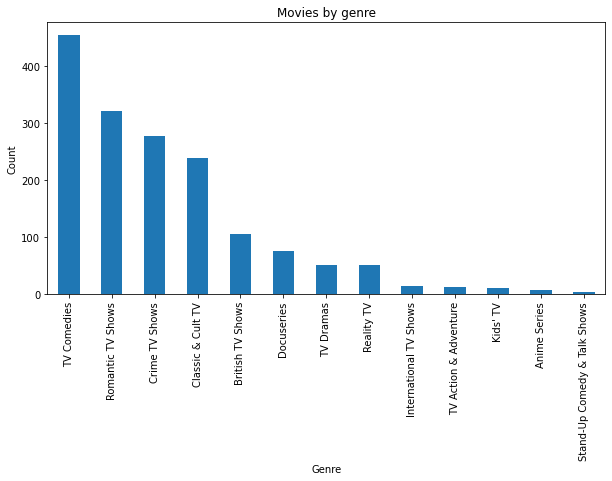

In [32]:
# graph displaying number of tv shows by genre
plt.figure(figsize=(10,5))
dfMerge.loc[dfMerge['type'] == 'TV Show'].listed_in.value_counts().plot(kind = 'bar')
plt.title('TV Shows by genre')
plt.xlabel('Genre')
plt.ylabel('Count')

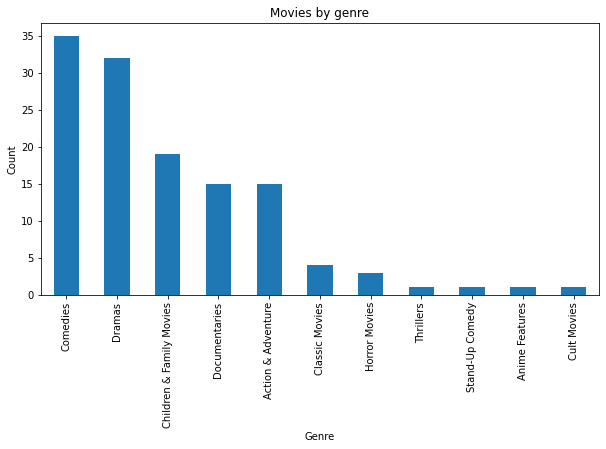

In [34]:
# graph displaying number of movies by genre
plt.figure(figsize = (10,5))
dfMerge.loc[dfMerge['type'] == 'Movie'].listed_in.value_counts().plot(kind = 'bar')
plt.title('Movies by genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

AttributeError: 'Line2D' object has no property 'kind'

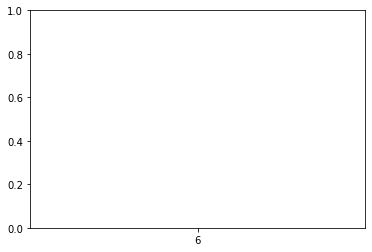

In [204]:
#graph showing number of shows and movies watched per month
# plt.figure(figsize = (20,10))
dates = dfMerge['Date'].apply(lambda x: x.split('/')[::2])
month = dates.apply(lambda x:x[0])
year = dates.apply(lambda x: x[1])

pdDates = pd.DataFrame(dates)

pdDates['Month'] = month
pdDates['Year'] = year
pdDates
pdMonth_year = pdDates.groupby(['Month',"Year"]).size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)
pdMonth_year
plt.plot(pdMonth_year['Month'],pdMonth_year['count'],kind='bar')